# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Brightspace.

Your code and analysis is like a story that awaits to be read, make it a nice story please. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 13 March, 2023, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases, deaths, and trends of COVID-19 in the United States. CDC collects and makes public deidentified individual-case data on a daily basis, submitted using standardized case reporting forms. In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction. CDC collects demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. It also includes information on whether the individual survived or not.

The dataset we work with is a sample of the public data released by CDC, where the outcome for the target feature death_yn is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4

Each student will work with a different subset of the data. The CSV file is named using the format: **covid19-cdc-[your-student-number].csv**, e.g., **covid19-cdc-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/137_o3OVj8Y5C8-PCQlX-RpmHh439qe9U?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B.



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Save the initial discussion of your findings into a single data quality report PDF file. 
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

(0). Background for the given data analytics problem and dataset.
check the PDF report "Data_Quality_Report_and_Plan_Initial_Findings.pdf" for background and important terminology for this problem.

In [8]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
# read in data from csv file to pandas dataframe.  
df = pd.read_csv('covid19-cdc-22202041.csv',  keep_default_na=True, delimiter=',', skipinitialspace=True)

(1). Prepare a data quality report for the CSV file.

Check shape of CSV file

In [10]:
df.shape

(20000, 19)

Print first and last 5 rows of CSV file

In [11]:
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-08,KY,21.0,JEFFERSON,21111.0,65+ years,Male,White,Non-Hispanic/Latino,2.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,Yes
1,2021-06,TX,48.0,DALLAS,48113.0,Missing,Male,Black,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
2,2021-11,MO,29.0,NaN,NaN,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Yes,NaN
3,2020-07,FL,12.0,PALM BEACH,12099.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN
4,2020-11,KS,20.0,RENO,20155.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Yes,No,Yes,NaN


In [12]:
df.tail(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
19995,2021-12,WI,55.0,MARATHON,55073.0,50 to 64 years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
19996,2022-01,NC,37.0,HENDERSON,37089.0,0 - 17 years,Male,Unknown,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,No,NaN
19997,2020-05,AZ,4.0,YUMA,4027.0,18 to 49 years,Male,White,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
19998,2021-08,FL,12.0,BAY,12005.0,50 to 64 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
19999,2020-12,MA,25.0,ESSEX,25009.0,0 - 17 years,Male,White,Unknown,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


Convert features to appropriate datatypes

In [13]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

Based on examining the data in a spreadsheet program, 2 of the features are continuous and the rest are categorical.

In [14]:
# Select columns containing categorical data
# These colums were chosen as categories because 
# there data contains single or multiple digit values each representing a different meaning
# rather than they can be shown as a numerical and continuous values.
# So they can't be continuous.
categorical_columns = df[['case_month','res_state','state_fips_code','res_county','county_fips_code','age_group','sex','race','ethnicity','process','exposure_yn','current_status','symptom_status','hosp_yn','icu_yn','death_yn','underlying_conditions_yn']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

Check for duplicate row/columns

In [15]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  1119
Number of duplicate rows (including first) in the table is: 2001


In [16]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


Duplicate rows can be seen below

In [17]:
# Show duplicate row data that can be dropped
df[df.duplicated(keep=False)]

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
8,2021-01,CA,6.0,LOS ANGELES,6037.0,65+ years,Male,Asian,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Yes,Yes,NaN
10,2020-12,VA,51.0,SMYTH,51173.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN
19,2022-01,OH,39.0,CUYAHOGA,39035.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
29,2020-12,AZ,4.0,MARICOPA,4013.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
30,2021-01,PA,42.0,MONTGOMERY,42091.0,65+ years,Male,White,Unknown,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19871,2022-04,NY,36.0,NASSAU,36059.0,18 to 49 years,Male,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
19888,2022-01,IN,18.0,ST. JOSEPH,18141.0,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
19912,2022-01,CO,8.0,WELD,8123.0,18 to 49 years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
19944,2021-12,NY,36.0,NASSAU,36059.0,18 to 49 years,Male,Missing,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


Duplicate rows will now be dropped from the original data frame.

In [18]:
df = df.drop_duplicates(keep=False)
# get duplicated row data. Use "keep=False" to mark all duplicates as true
print('Duplicate remaining rows:', df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 0


It's a little strange that the illustrated "duplicate" are not 100% match the csv file. But after a manufacturing
check, I decide to remove the duplicate rows.

### Check for constant columns

In [19]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
case_month,17999,35,2022-01,2232
res_state,17998,49,NY,1772
state_fips_code,17998.0,49.0,36.0,1772.0
res_county,16877,862,MIAMI-DADE,341
county_fips_code,16877.0,1203.0,12086.0,341.0
age_group,17860,5,18 to 49 years,6796
sex,17638,4,Female,9121
race,15796,8,White,11167
ethnicity,15606,4,Non-Hispanic/Latino,10871
process,17999,10,Missing,16264


### since there are no constant columns(only 1 unique value), we didn't remove any columns.

### - Save updated/cleaned data frame to a new csv file.

In [20]:
# Write the dataframe to a csv file
df.to_csv('covid19-cdc-22202041-2.csv', index=False)

### - Prepare a table with descriptive statistics for all the continuous features.

In [21]:
# Print table with descriptive statistics for all the continuous features
continuous_columns = df.select_dtypes(['float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,9666.0,0.195427,2.139662,-89.0,0.0,0.0,0.0,55.0
case_onset_interval,8283.0,-0.046601,2.290695,-69.0,0.0,0.0,0.0,76.0


### - Save descriptive statistics for all the continuous features to csv for data quality report

In [22]:
continuousFeatueDesc = df[continuous_columns].describe().T
continuousFeatueDesc.to_csv("continuousFeatureDescription.csv")

### - Prepare a table with descriptive statistics for all the categorical features.

In [23]:
# Print table with descriptive statistics for all the categorical features
#df.select_dtypes(['category']).describe().T
categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].describe().T

,count,unique,top,freq
case_month,17999,35,2022-01,2232
res_state,17998,49,NY,1772
state_fips_code,17998.0,49.0,36.0,1772.0
res_county,16877,862,MIAMI-DADE,341
county_fips_code,16877.0,1203.0,12086.0,341.0
age_group,17860,5,18 to 49 years,6796
sex,17638,4,Female,9121
race,15796,8,White,11167
ethnicity,15606,4,Non-Hispanic/Latino,10871
process,17999,10,Missing,16264


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [24]:
categoricalFeatueDesc = df[categorical_columns].describe().T
categoricalFeatueDesc.to_csv("categoricalFeatureDescription.csv")

### - Plot histograms summary sheet for all the continuous features.（not required for the assignment 1)

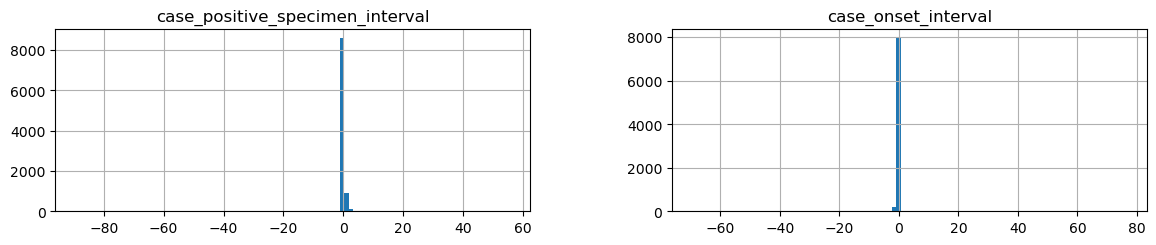

In [25]:
# Plot a histogram summary sheet of the continuous features and save in a png file
df[continuous_columns].hist(layout=(10, 4), figsize=(30,30), bins=100)
plt.savefig('continuous_histograms_1-1.pdf')

### - Plot histograms individual sheet for all the continuous features.

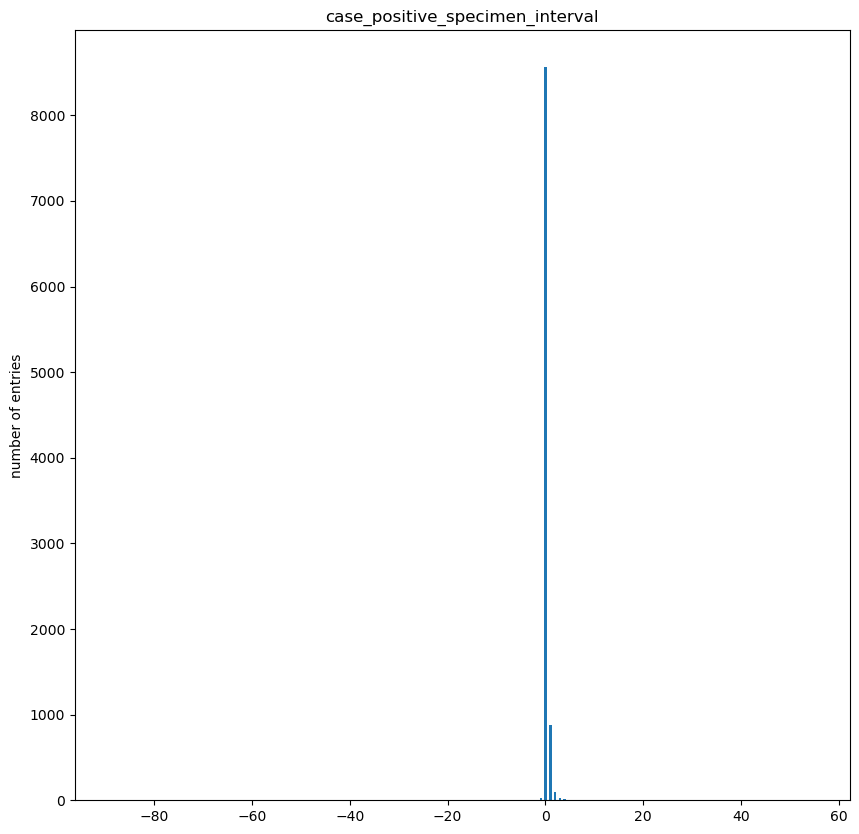

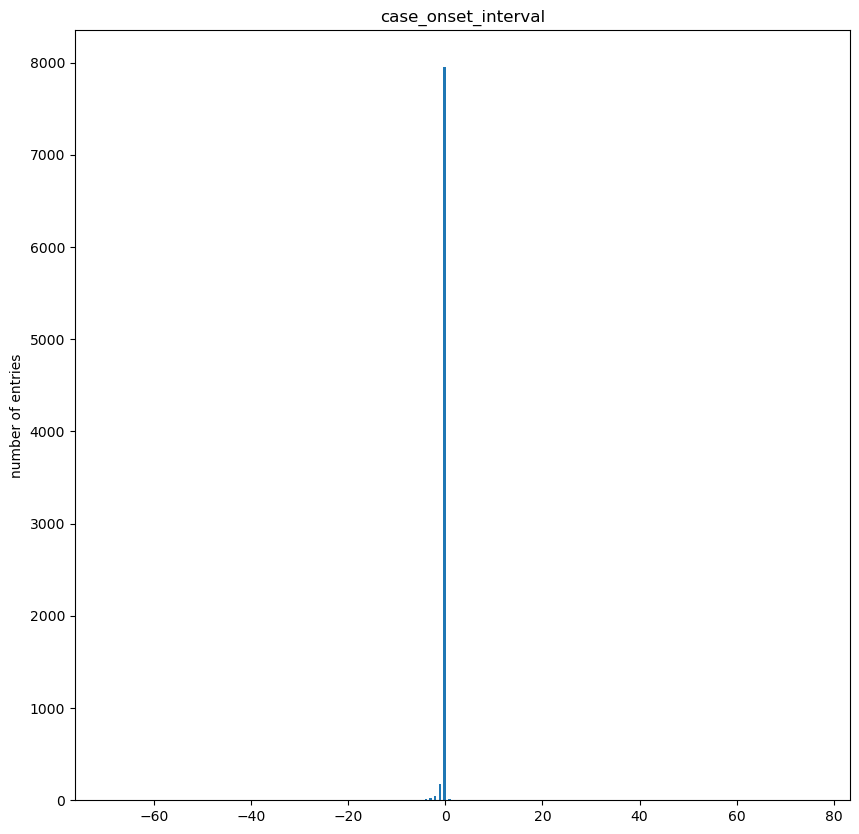

In [26]:
for col in continuous_columns:
        f = df[col].plot(kind='hist', figsize=(10,10), bins=300)
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()    

### - Plot box plots individual sheet for all the continuous features.

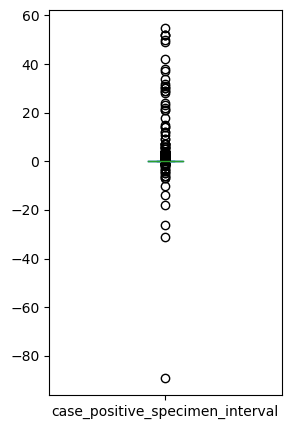

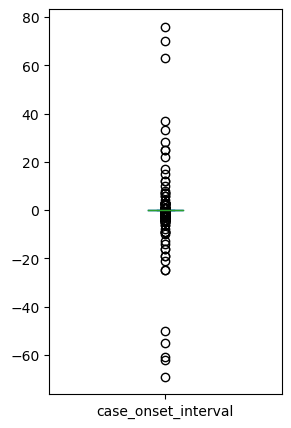

In [27]:
# Plot box plots for all the continuous features and save in a PDF file
with PdfPages('continuous_boxplots_1-1.pdf') as pp:
    for col in continuous_columns:
        f = df[col].plot(kind='box', figsize=(3,5))
        pp.savefig(f.get_figure())
        plt.show()    

### - Plot bar plots individual sheet for all the categorical features.

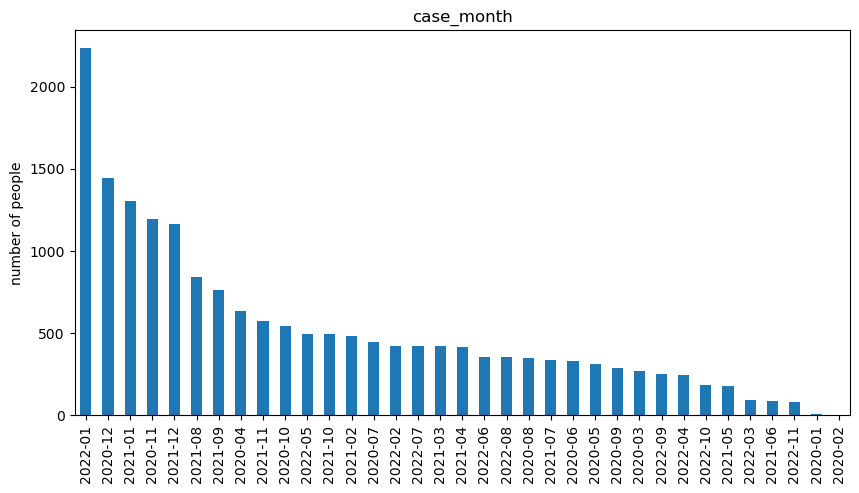

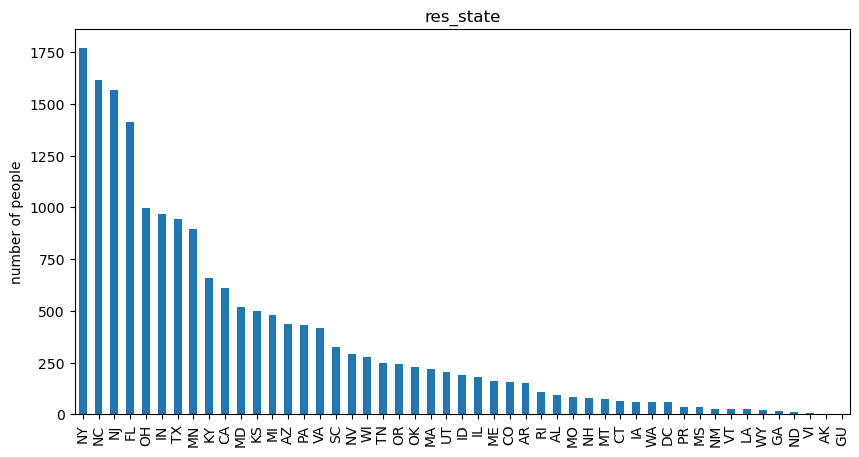

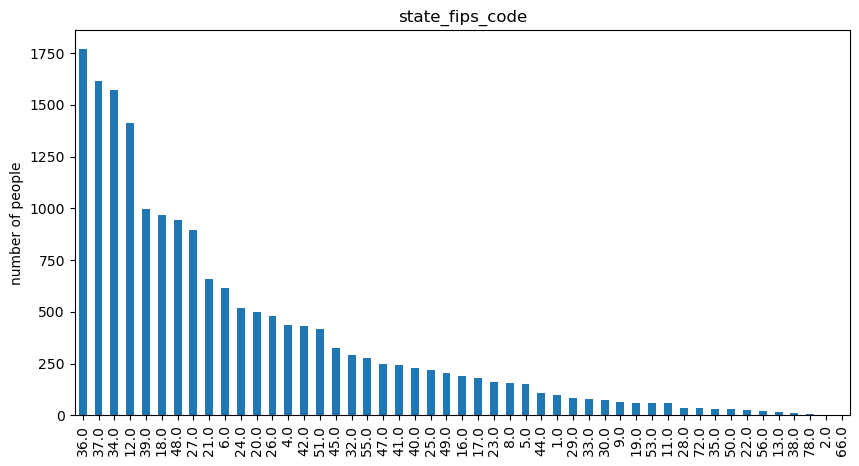

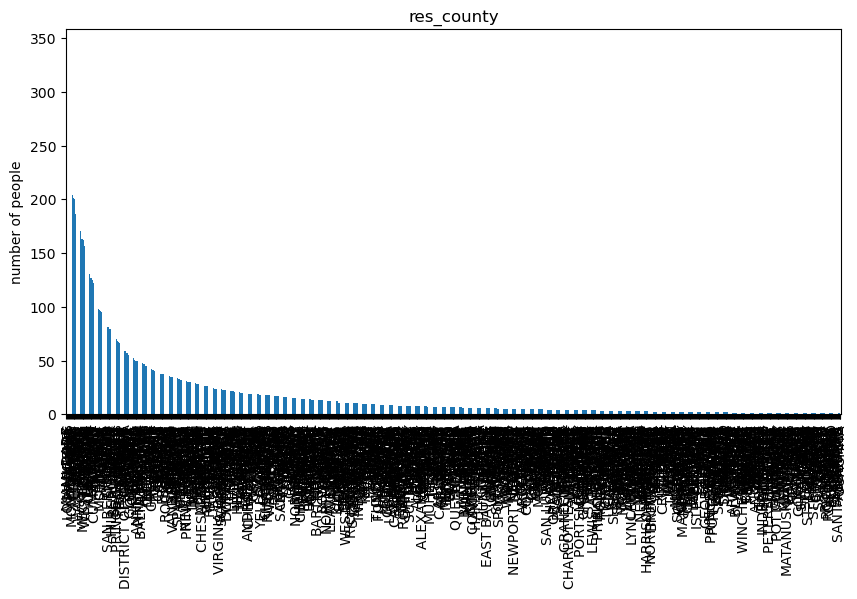

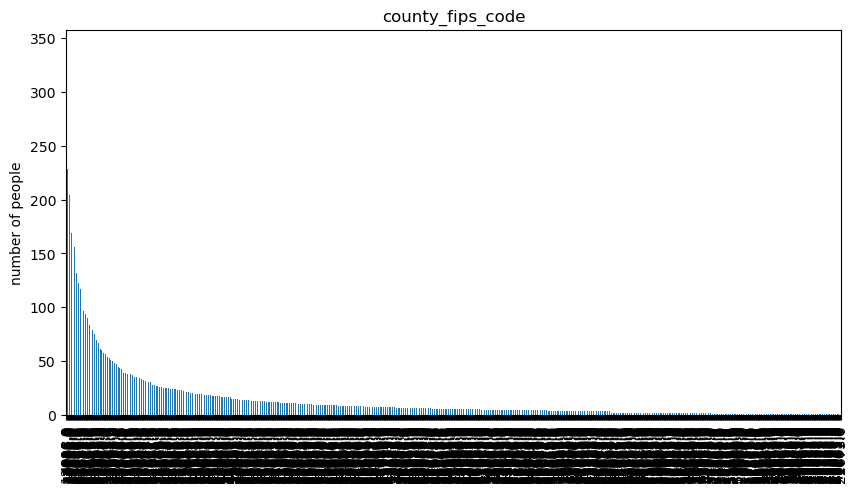

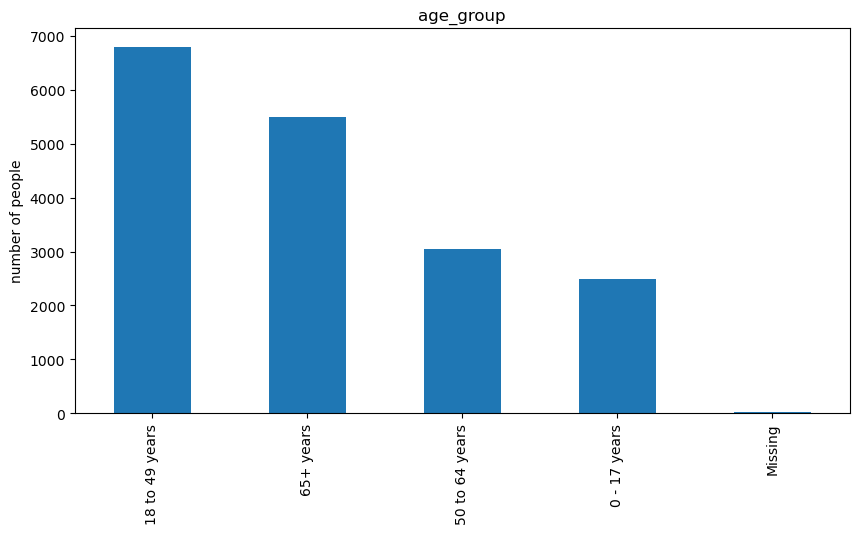

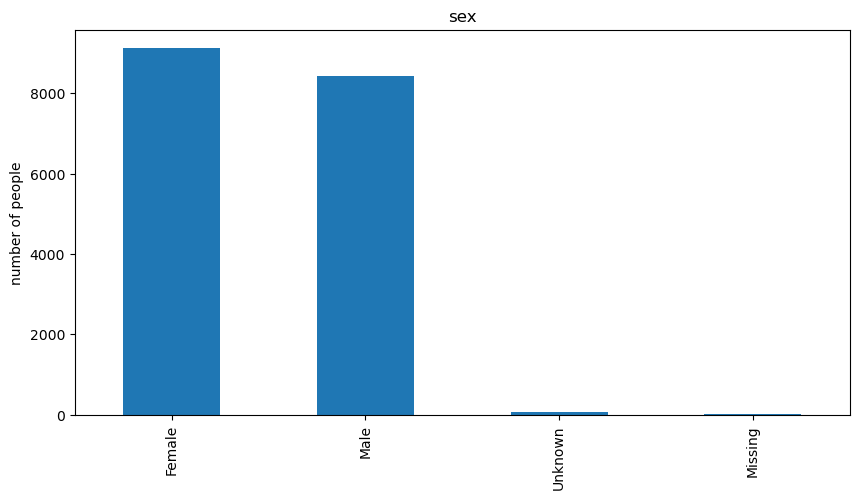

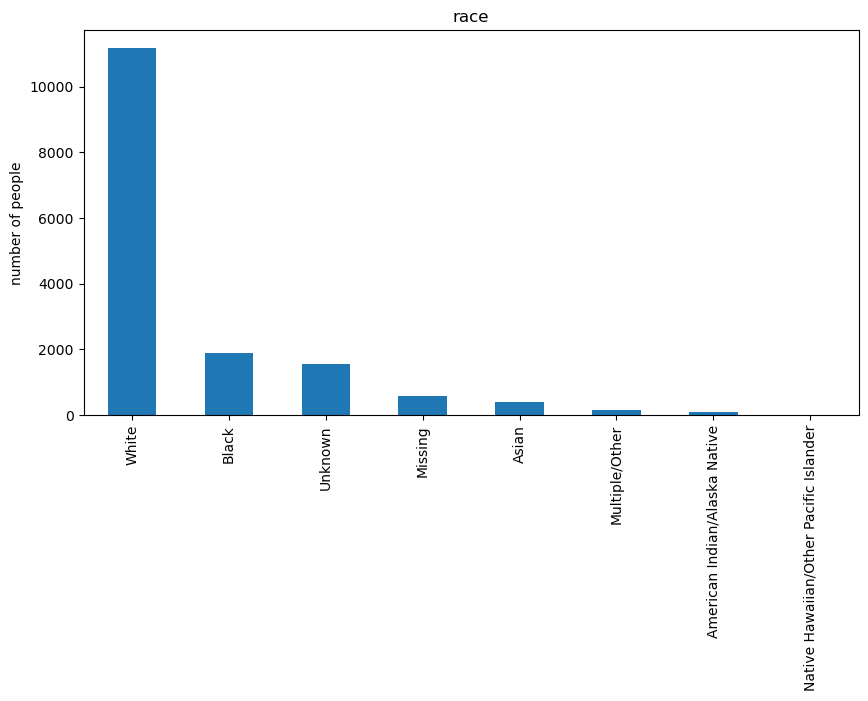

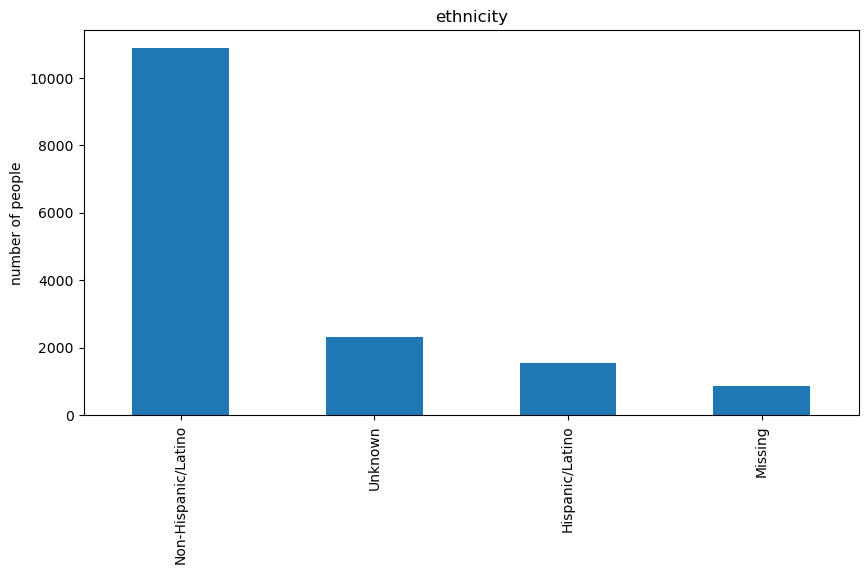

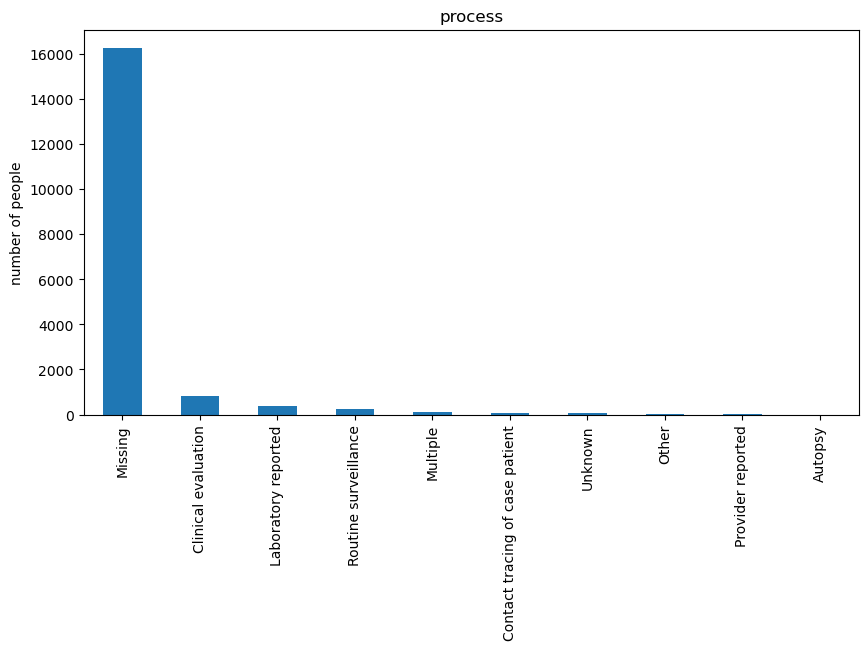

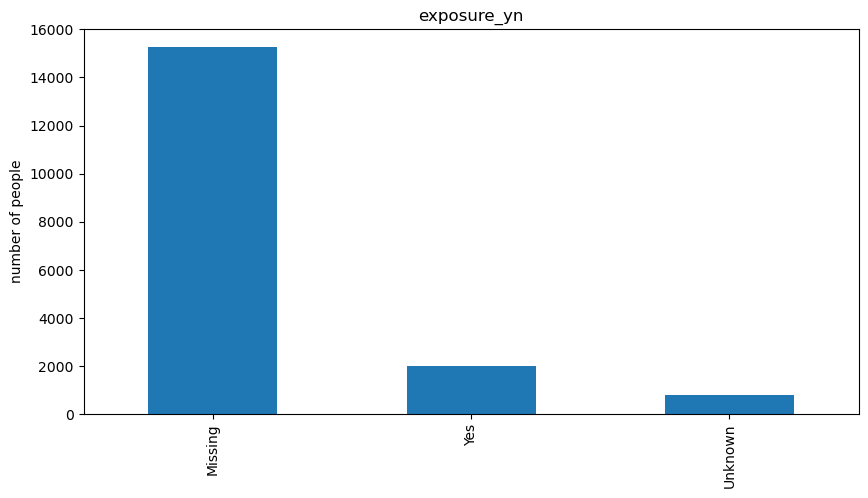

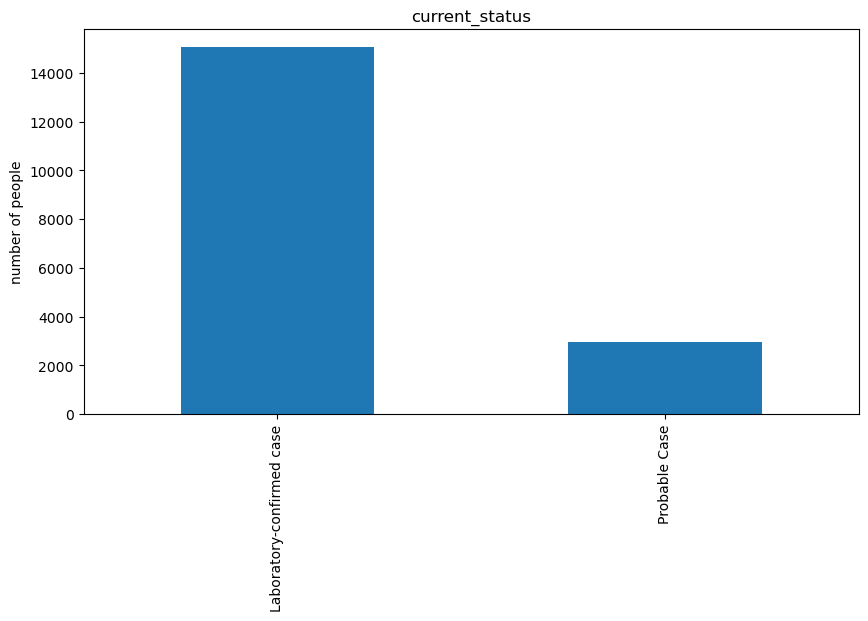

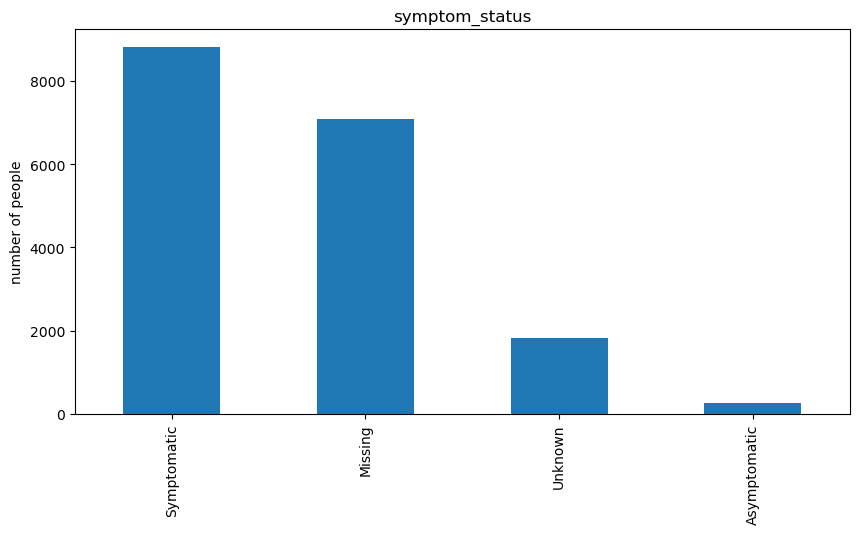

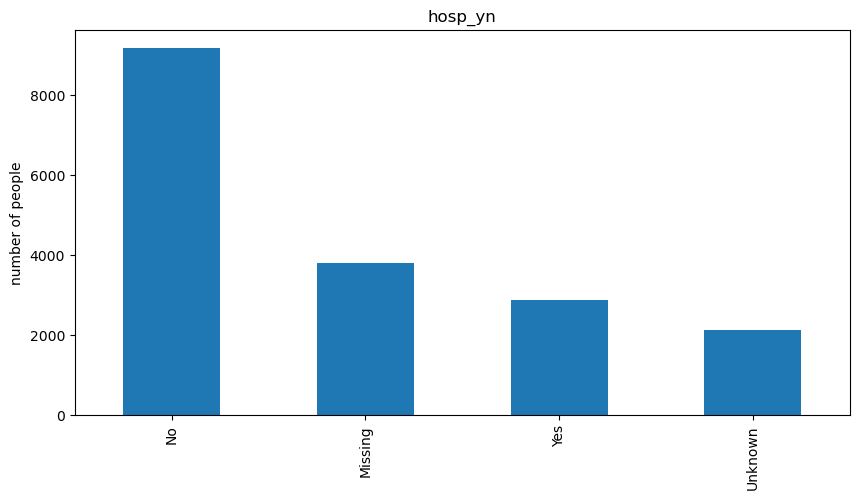

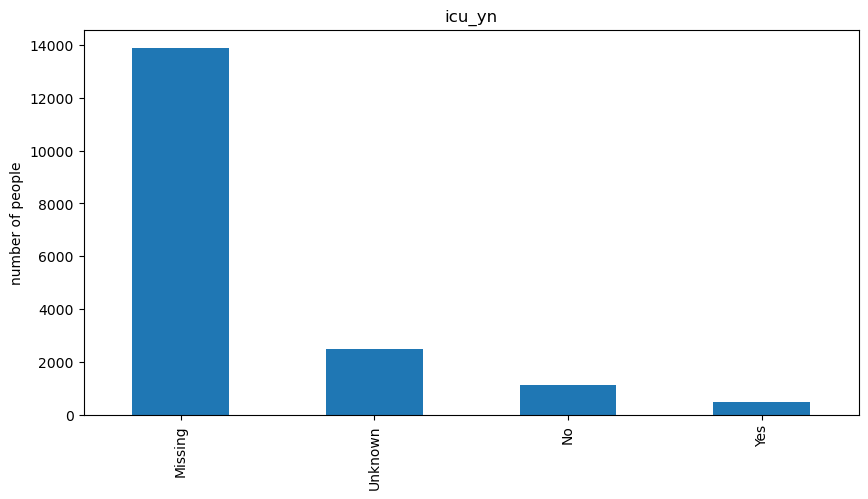

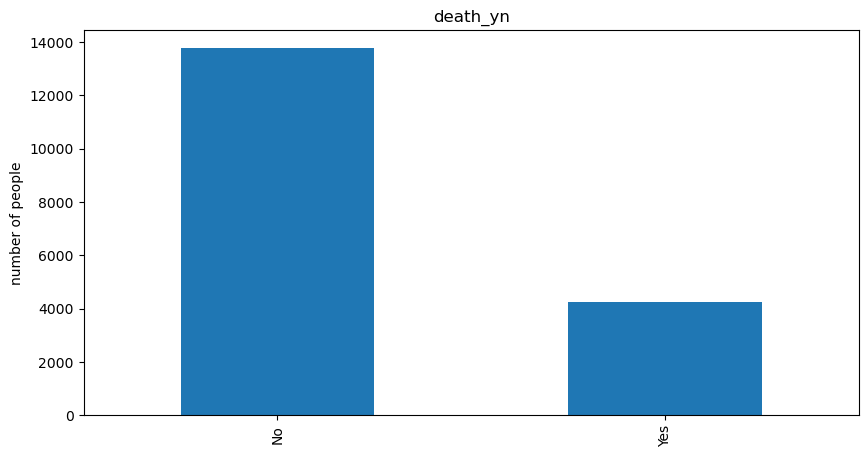

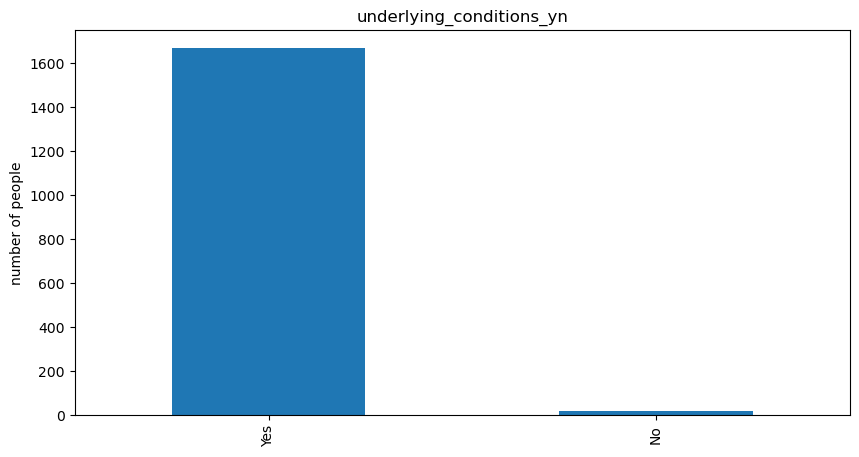

In [28]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for col in categorical_columns:
        f = df[col].value_counts().plot(kind='bar', figsize=(10,5))
        plt.title(col)
        plt.ylabel('number of people')
        pp.savefig(f.get_figure())
        plt.show()

### 2.Data quality plan for the cleaned csv file [30]

1. case_month: do nothing.  Because everything about this is right

2. rest_state : do nothing.  Because everything about this is right

 3.state_fips_code: do nothing. because it can accuracy match the res_state

4. delete 'res_county': because it can't match county_fips_code. (county:862 code:1263)

In [29]:
df = df.drop(['res_county'], axis=1)

5. county_fips_code: do nothing. because we had delete the 'res_county' yet, so it won't be any ambiguity for the county code.

6. age_group: do nothing. because the missing data don't have any negative affect.

7. sex: combine the answer group "Missing" and "Unknown" together as "Missing". Because they have the same meaning.

In [30]:
df['sex'] = df['sex'].replace(['Unknown'], 'Missing')

8.race:combine the answer group "Missing" and "Unknown" together as "Missing". Because they have the same meaning.

In [31]:
df['race'] = df['race'].replace(['Unknown'], 'Missing')

9.Ethnicity :combine the answer group "Missing" and "Unknown" together as "Missing". Because they have the same meaning.

In [32]:
df['ethnicity'] = df['ethnicity'].replace(['Unknown'], 'Missing')

10: process, delete this. Because too many values are missing.

In [33]:
df = df.drop('process', axis=1)

11. exposure_yn:combine the answer group "Missing" and "Unknown" together as "Missing". Because they have the same meaning.

In [34]:
df['exposure_yn'] = df['exposure_yn'].replace(['Unknown'], 'Missing')

12. current_status. Do nothing. Every data is perfect.

13. symptom_status:combine the answer group "Missing" and "Unknown" together as "Missing". Because they have the same meaning.

In [35]:
df['symptom_status'] = df['symptom_status'].replace(['Unknown'], 'Missing')

14. hosp_yn:combine the answer group "Missing" and "Unknown" together as "Missing". Because they have the same meaning.

In [36]:
df['hosp_yn'] = df['hosp_yn'].replace(['Unknown'], 'Missing')

15. icu_yn:combine the answer group "Missing" and "Unknown" together as "Missing". Because they have the same meaning.

In [37]:
df['icu_yn'] = df['icu_yn'].replace(['Unknown'], 'Missing')

16.death_yn: do nothing. everything is right.

17. underlying_conditions_yn: do nothing. data correct.

18: case_positive_specimen_interval: Take all values to absolute values. Rationale: Although it could be omitted, it has been stated in the preliminary report that these negative values may be caused by inverting the subtrahend and subtrahend. Therefore, it is more effective to take the absolute value.

In [38]:
df['case_positive_specimen_interval'] = abs(df['case_positive_specimen_interval'])

19：case_onset_interval：Take all values to absolute values.Reason is the same as above number 18.

In [39]:
df['case_onset_interval'] = df['case_onset_interval'].abs()

### Cleaning Finished! Create a new file named "covid19-cdc-22202041-3"

In [40]:
df.to_csv('covid19-cdc-22202041-3.csv', index=False)

In [41]:
import pandas as pd

# Create a list of dictionaries containing the dealing methods and their reasons
dealing_methods = [
    {'Field': 'case_month', 'Dealing Method': 'Do nothing', 'Reason': 'Data correct'},
    {'Field': 'res_state', 'Dealing Method': 'Do nothing', 'Reason': 'Data correct'},
    {'Field': 'state_fips_code', 'Dealing Method': 'Do nothing', 'Reason': 'Can accurately match the res_state'},
    {'Field': 'res_county', 'Dealing Method': 'Delete', 'Reason': 'Cannot match county_fips_code'},
    {'Field': 'county_fips_code', 'Dealing Method': 'Do nothing', 'Reason': 'No ambiguity since res_county is deleted'},
    {'Field': 'age_group', 'Dealing Method': 'Do nothing', 'Reason': 'Missing data has no negative affect'},
    {'Field': 'sex', 'Dealing Method': 'Combine "Missing" and "Unknown" into "Missing"', 'Reason': 'Same meaning'},
    {'Field': 'race', 'Dealing Method': 'Combine "Missing" and "Unknown" into "Missing"', 'Reason': 'Same meaning'},
    {'Field': 'ethnicity', 'Dealing Method': 'Combine "Missing" and "Unknown" into "Missing"', 'Reason': 'Same meaning'},
    {'Field': 'case_positivity_rate', 'Dealing Method': 'Delete', 'Reason': 'Too many missing values'},
    {'Field': 'exposure_yn', 'Dealing Method': 'Combine "Missing" and "Unknown" into "Missing"', 'Reason': 'Same meaning'},
    {'Field': 'current_status', 'Dealing Method': 'Do nothing', 'Reason': 'Data correct'},
    {'Field': 'symptom_status', 'Dealing Method': 'Combine "Missing" and "Unknown" into "Missing"', 'Reason': 'Same meaning'},
    {'Field': 'hosp_yn', 'Dealing Method': 'Combine "Missing" and "Unknown" into "Missing"', 'Reason': 'Same meaning'},
    {'Field': 'icu_yn', 'Dealing Method': 'Combine "Missing" and "Unknown" into "Missing"', 'Reason': 'Same meaning'},
    {'Field': 'death_yn', 'Dealing Method': 'Do nothing', 'Reason': 'Data correct'},
    {'Field': 'underlying_conditions_yn', 'Dealing Method': 'Do nothing', 'Reason': 'Data correct'},
    {'Field': 'case_positive_specimen_interval', 'Dealing Method': 'Take absolute value', 'Reason': 'Negative values may be caused by inverting the subtrahend and subtrahend'},
    {'Field': 'case_onset_interval', 'Dealing Method': 'Take absolute value', 'Reason': 'Negative values may be caused by inverting the subtrahend and subtrahend'}
]

# Convert the list of dictionaries to a DataFrame
df_dealing_methods = pd.DataFrame(dealing_methods)

# Create a new Excel file and write the DataFrame to a sheet
with pd.ExcelWriter('dealing_methods.xlsx') as writer:
    df_dealing_methods.to_excel(writer, index=False)


##  (3). [15] Exploring relationships between feature pairs:

### Firstly, let's choose the following features: age_group, sex, race, ethnicity, current_status, symptom_status, hosp_yn, icu_yn, and death_yn. These features are relevant to the COVID-19 pandemic and could potentially be related to the target outcome, which is whether a person has tested positive for COVID-19.We may create a correlation matrix to see if any features have a strong correlation with each other. This will help me identify any potential multicollinearity issues that could affect my later analysis.

In [44]:
# Correlation between continuous features
import seaborn as sns
corr = df[continuous_columns].corr()

<AxesSubplot:>

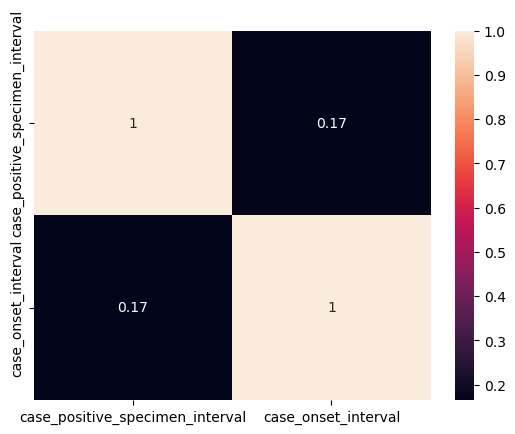

In [45]:
sns.heatmap(corr,annot=True)

In [52]:
# Whether age is related to mortality
age_group = df.loc[df['death_yn']=='Yes'].groupby(by='age_group')['death_yn'].count()
age_group

age_group
0 - 17 years         0
18 to 49 years     102
50 to 64 years     416
65+ years         3700
Missing              7
Name: death_yn, dtype: int64

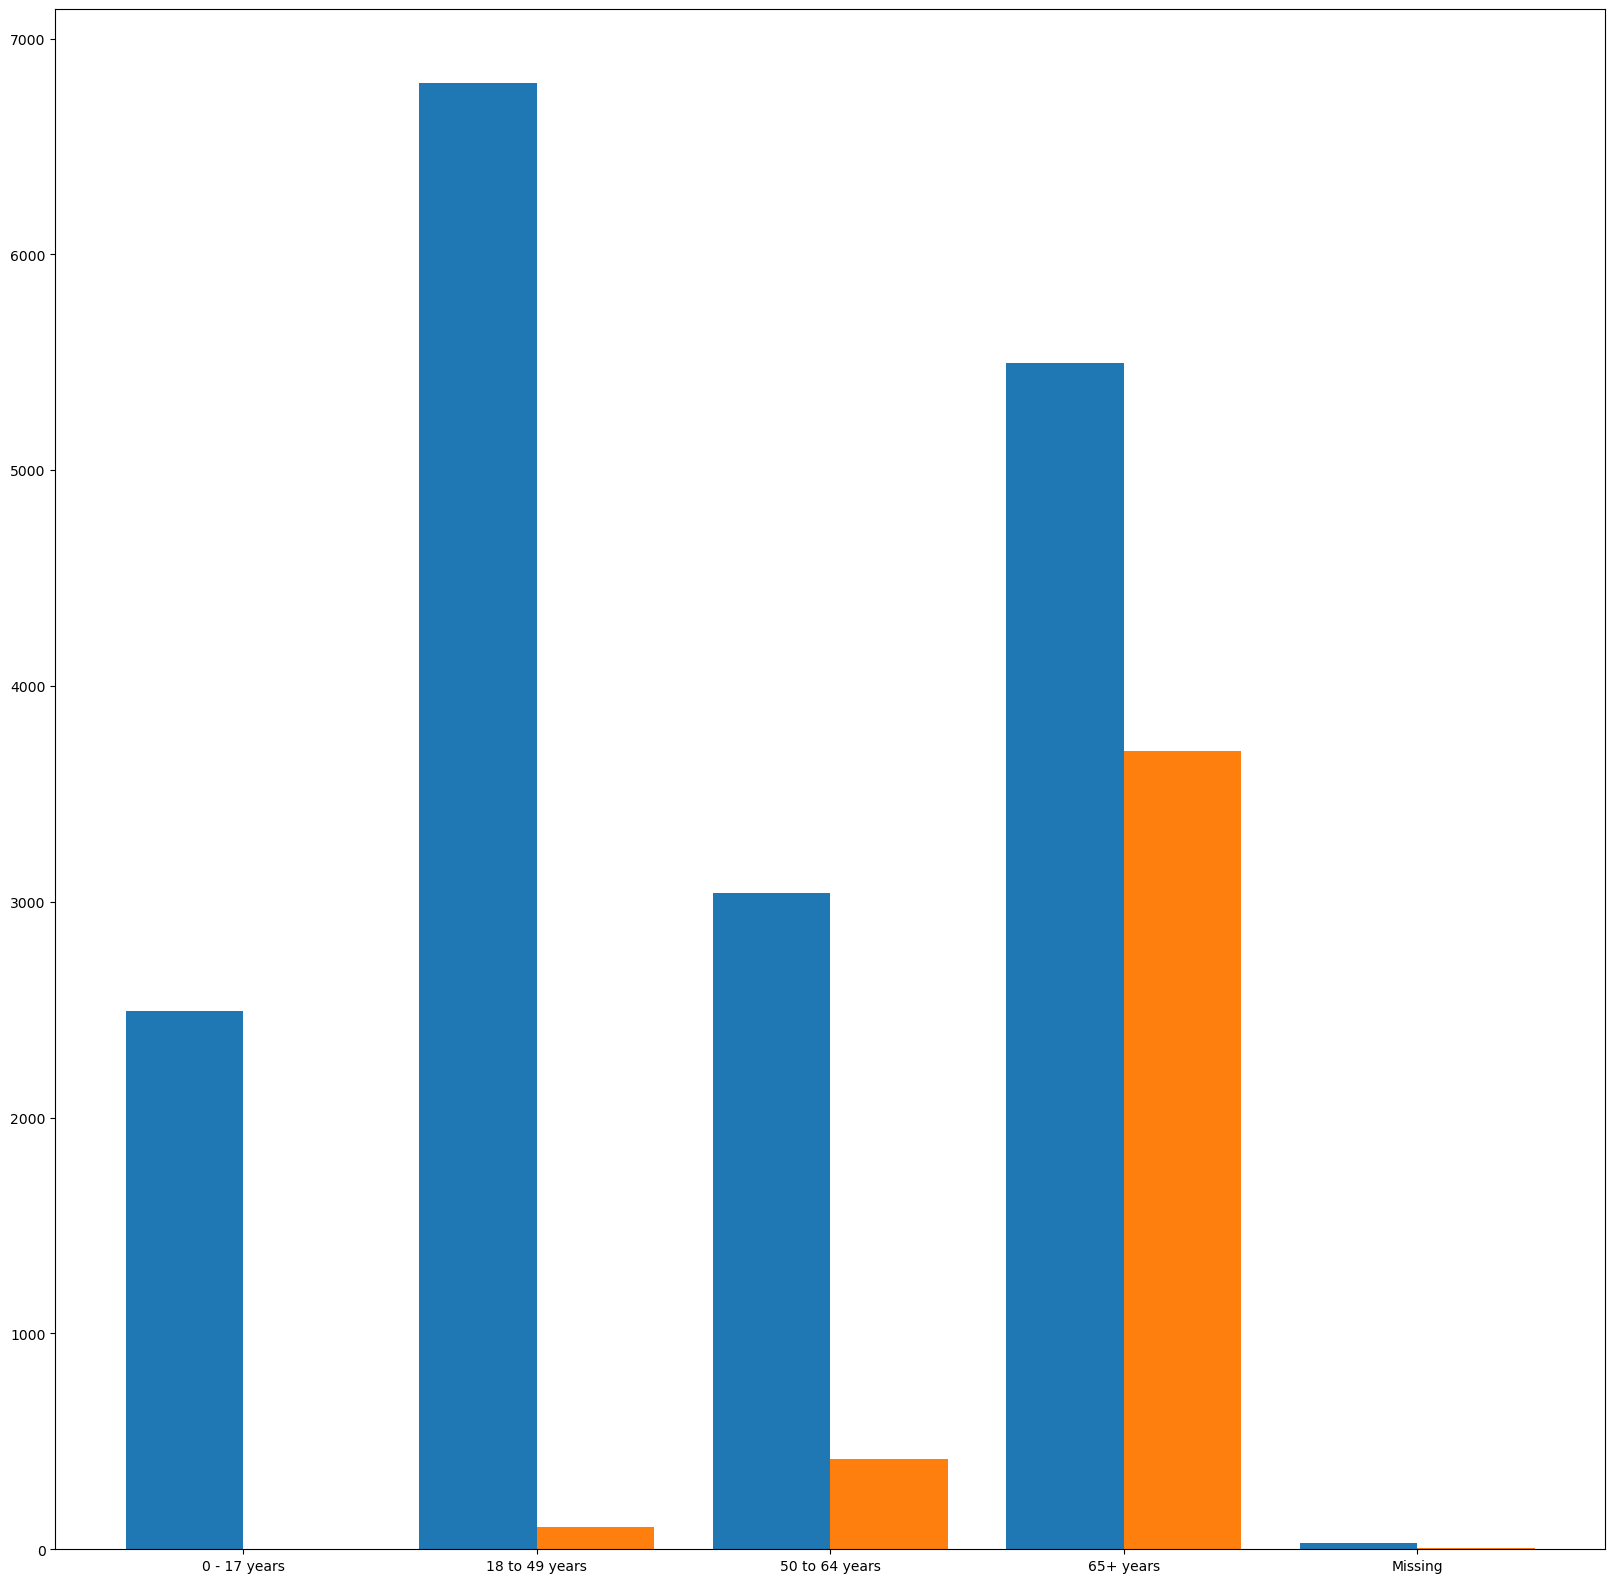

In [56]:
import numpy as np
plt.figure(figsize=(20,20))
plt.bar(np.arange(len(age.index))-0.2,age,0.4)
plt.bar(np.arange(len(age.index))+0.2,age_group,0.4)
plt.xticks(np.arange(len(age.index)),age.index)
plt.show()

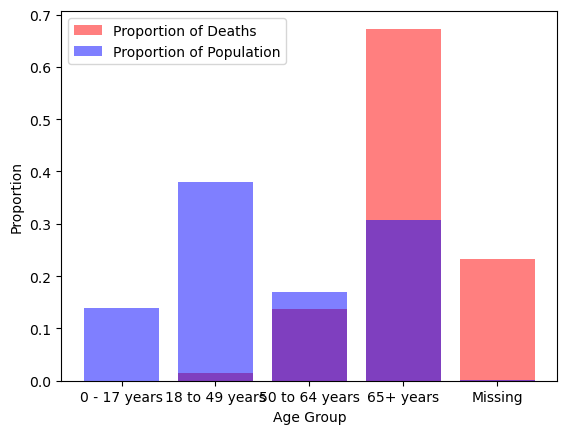

In [51]:
#Check the relationship between Proportion of Deaths and Proportion of Population
import matplotlib.pyplot as plt

# Count the number of deaths for each age group
deaths_by_age = df.loc[df['death_yn']=='Yes'].groupby(by='age_group')['death_yn'].count()

# Calculate the total number of people in each age group
total_by_age = df.groupby(by='age_group')['death_yn'].count()

# Calculate the proportion of deaths in each age group
prop_deaths_by_age = deaths_by_age / total_by_age

# Calculate the proportion of the population in each age group
prop_pop_by_age = total_by_age / total_by_age.sum()

# Plot the proportions of deaths and population for each age group
plt.bar(prop_deaths_by_age.index, prop_deaths_by_age, color='red', alpha=0.5, label='Proportion of Deaths')
plt.bar(prop_pop_by_age.index, prop_pop_by_age, color='blue', alpha=0.5, label='Proportion of Population')
plt.legend()
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.show()

###  (4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

In [64]:
#1 Create new feature for days between onset and specimen collection
df['age_cond'] = df['case_positive_specimen_interval'] - df['case_onset_interval']

# Save the cleaned dataset with new features as CSV file
df.to_csv('covid19-cdc-22202041-4.csv', index=False)

In [76]:
#2 Age category
bins = [0, 18, 49, np.inf]
labels = ['young', 'middle-aged', 'elderly']
df['age_category'] = pd.cut(df['age_group'], bins=bins, labels=labels)

#3 Race and ethnicity category
df['race_ethnicity'] = df['race'].astype(str) + '_' + df['ethnicity'].astype(str)

#4 Exposure history
df['exposure_binary'] = df['exposure_yn'].apply(lambda x: 1 if x == 'Yes' else 0)

#5 Severity level
df['severity'] = df['hosp_yn'].astype(str) + '_' + df['icu_yn'].astype(str)

In [77]:
df.to_csv('covid19-cdc-22202041-5.csv', index=False)